<a href="https://colab.research.google.com/github/rmiller34/ATMS-597-SP-2020/blob/master/ATMS_597_Project_2_Upload.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ATMS 597 Project 2: Making Climate Stripes
Created by: Kevin Gray, Rylan Housenga, Rose Miller
 

###Import packages

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Run API Request

In [0]:
import requests

def make_request(endpoint, payload=None):
    """
    Make a request to a specific endpoint on the weather API
    passing headers and optional payload.
    
    Parameters:
        - endpoint: The endpoint of the API you want to 
                    make a GET request to.
        - payload: A dictionary of data to pass along 
                   with the request.
    
    Returns:
        Response object.
    """
    return requests.get(
        f'https://www.ncdc.noaa.gov/cdo-web/api/v2/'+endpoint,
        headers={
            'token': 'yicVcIaiwUAgtBveaBtWSaioiQvqRJRh'
        },
        params=payload
    )

### Cell to look up locationID

In [0]:
### This cell will request locations. We used this to find the locationid for Champaign, IL area.
# !!!No need to run this cell again unless we want to look up a new locationid!!!

response = make_request(
    'locations', 
    {
        'datasetid' : 'GHCND', 
        'locationcategoryid' : 'CITY',
        'datacategoryid' : 'TEMP',
        'sortorder' : 'desc',
        'limit' : 1000 # max allowed
    }
)
response.json()

### Cell to look up stationID

In [0]:
# This cell will request stations. We used this to find the stationid for Rantoul, IL station.
# !!!No need to run this cell again unless we want to look up a new stationid!!!

response = make_request(
    'stations', 
    {
        'datasetid' : 'GHCND',
        'locationid' : 'CITY:US170004', 
        'datacategoryid' : 'TEMP',
        'limit' : 1000 # max allowed
    }
)
response.json()

## Example of running data for Rantoul, IL

In [0]:
# Create lists containing the beginning and end of years we want to loop over.

yearstoget = np.arange(1949,2020)
currentlist = []
endlist = []
for i in yearstoget:
    currentlist.append(datetime.date(i, 1, 1))
    endlist.append(datetime.date(i, 12, 31))

In [0]:
# This cell will request the data

resultsmax = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numpy array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    print(currentlist[i])
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMAX',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    resultsmax.extend(response.json()['results']) # put the data in the results list

1949-01-01
1950-01-01
1951-01-01
1952-01-01
1953-01-01
1954-01-01
1955-01-01
1956-01-01
1957-01-01
1958-01-01
1959-01-01
1960-01-01
1961-01-01
1962-01-01
1963-01-01
1964-01-01
1965-01-01
1966-01-01
1967-01-01
1968-01-01
1969-01-01
1970-01-01
1971-01-01
1972-01-01
1973-01-01
1974-01-01
1975-01-01
1976-01-01
1977-01-01
1978-01-01
1979-01-01
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01
2000-01-01
2001-01-01
2002-01-01
2003-01-01
2004-01-01
2005-01-01
2006-01-01
2007-01-01
2008-01-01
2009-01-01
2010-01-01
2011-01-01
2012-01-01
2013-01-01
2014-01-01
2015-01-01
2016-01-01
2017-01-01
2018-01-01
2019-01-01


In [0]:
# This cell will request the data

resultsmin = [] # get an empty list to fill with data
numloops = np.arange(len(currentlist)) # fill a numpy array with the length of the list of years we want

#Start the loop over the years we want
for i in numloops:
    print(currentlist[i])
    current = currentlist[i] # set current to the beginning of the year in our loop
    end = endlist[i] # set end to the end of the year in our loop
    # update the cell with status information
    #display.clear_output(wait=True)
    #display.display(f'Gathering data for {str(current)}')
    response = make_request(
        'data', 
        {
            'datasetid' : 'GHCND', # Global Historical Climatology Network - Daily (GHCND) dataset
            'datatypeid' : 'TMIN',
            'stationid' : 'GHCND:USW00014806',
            'startdate' : current,
            'enddate' : end,
            'units' : 'metric',
            'limit' : 1000 # max allowed
        }
    )
    response.json()
    resultsmin.extend(response.json()['results']) # put the data in the results list

1949-01-01
1950-01-01
1951-01-01
1952-01-01
1953-01-01
1954-01-01
1955-01-01
1956-01-01
1957-01-01
1958-01-01
1959-01-01
1960-01-01
1961-01-01
1962-01-01
1963-01-01
1964-01-01
1965-01-01
1966-01-01
1967-01-01
1968-01-01
1969-01-01
1970-01-01
1971-01-01
1972-01-01
1973-01-01
1974-01-01
1975-01-01
1976-01-01
1977-01-01
1978-01-01
1979-01-01
1980-01-01
1981-01-01
1982-01-01
1983-01-01
1984-01-01
1985-01-01
1986-01-01
1987-01-01
1988-01-01
1989-01-01
1990-01-01
1991-01-01
1992-01-01
1993-01-01
1994-01-01
1995-01-01
1996-01-01
1997-01-01
1998-01-01
1999-01-01
2000-01-01
2001-01-01
2002-01-01
2003-01-01
2004-01-01
2005-01-01
2006-01-01
2007-01-01
2008-01-01
2009-01-01
2010-01-01
2011-01-01
2012-01-01
2013-01-01
2014-01-01
2015-01-01
2016-01-01
2017-01-01
2018-01-01
2019-01-01


In [0]:
len(resultsmax) # check the length of the results list to make sure we have the correct number of days

25399

## Creates dataframe with just Date and TAVG

In [0]:
# Put data imported into pandas DataFrames
 
df = pd.DataFrame(resultsmax)
df2 = pd.DataFrame(resultsmin)
 
# Change date columns to datetime format and make those columns the index

df['date']= pd.to_datetime(df['date']) 
df.index = df['date']
df2['date']= pd.to_datetime(df2['date']) 
df2.index = df2['date']


# Clean up dataframes
del df['datatype']
del df['station']
del df['attributes']
del df2['datatype']
del df2['station']
del df2['attributes']

# Change column names
df.columns = ['date','TMAX']
df2.columns = ['date','TMIN']


# Add TMIN column to TMAX dataframe & create a new column that displays the average temperature 
# We no longer need df2 since all of our data is now in one dataframe

df['TMIN'] = df2['TMIN']
df['TAVG'] = ((df['TMIN'] + df['TMAX'])/2)

# Clean up new dataframe so only the index (date) and TAVG columns exist

del df['TMAX']
del df['TMIN']
del df['date']
 
df.head()

# If you want a .csv with only date and TAVG, save it here:
#df.to_csv('Temp_avg_project_2.csv')
dftemp = df

##Load a CSV file here. Used to bypass API wait times.

In [0]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/gdrive')
# #change directory to the right spot
# import os 
# os.chdir('/content/gdrive/My Drive/ATMS_597_Project_2_csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
df = pd.read_csv('Temp_avg_project_2.csv') #located in rmiller34 Github: https://github.com/rmiller34/ATMS-597-SP-2020/blob/master/ATMS-597-SP-2020-Project-2/Temp_avg_project_2.csv
df['date']= pd.to_datetime(df['date']) 
df.index = df['date']
del df['TMAX']
del df['TMIN']
del df['date.1']
del df['date']
df.tail()

,TAVG
date,
1949-09-28,12.80
1949-09-29,9.45
1949-09-30,14.70
1949-10-01,15.85
1949-10-02,14.40


## Manually chose frequency for temperature averages. Ex: (Yearly, Monthly) by changing the avgfreg variable.

In [0]:
df = dftemp # This just makes sure the df is reset in case you want to select a different frequency below without rerunning cells above

# Choose the frequency that you want averages for:
#avgfreq = 'Y'
#avgfreq = 'M'
avgfreq = 'W'

if avgfreq == 'Y':
    headername = 'Yearly Average Temperature'
    numperyear = 1
    # Creates temperature anomalies
    df = df.groupby(pd.Grouper(freq=avgfreq)).mean()
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
    df.columns = [headername]
    df['Anomalies'] = (df[headername] - df[headername].mean())
    df
if avgfreq == 'M':
    headername = 'Monthly Average Temperature'
    numperyear = 12
    # Creates temperature anomalies
    df = df.groupby(pd.Grouper(freq=avgfreq)).mean()
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d').year
    df.columns = [headername]
    df['Anomalies'] = (df[headername] - df[headername].mean())
    df
if avgfreq == 'W':
    headername = 'Weekly Average Temperature'
    numperyear = 52
    weeklyresampledf = df.resample('D').interpolate()[::7]
    #weeklyresampledf.index = pd.to_datetime(weeklyresampledf.index, format='%Y-%m-%d').year
    weeklyresampledf.columns = [headername]
    weeklyresampledf['Anomalies'] = (weeklyresampledf[headername] - weeklyresampledf[headername].mean())
    df = weeklyresampledf

In [0]:
# A cell for quickly checking the min and max anomalies for color scale purposes.
print(min(df['Anomalies'].values))
print(max(df['Anomalies'].values))


-34.26975157095049
21.58024842904951


## This cell checks for any data anomalies that may affect anomalies data. It then lets you chose your own anomaly values.

In [0]:
print(df.nlargest(5,'Anomalies'))
print(df.nsmallest(5,'Anomalies'))

            Weekly Average Temperature  Anomalies
date                                             
2012-06-30                       32.50  21.580248
1953-06-20                       32.20  21.280248
1991-06-29                       31.95  21.030248
2012-07-07                       31.90  20.980248
1954-06-26                       31.65  20.730248
            Weekly Average Temperature  Anomalies
date                                             
1977-01-29                      -23.35 -34.269752
1996-02-03                      -23.05 -33.969752
1972-01-15                      -21.40 -32.319752
1989-12-23                      -21.40 -32.319752
1963-12-21                      -20.85 -31.769752


## Plotting our climate stripes. Remember to set vmin and vmax values to avoid dates that do not have full datasets

<Figure size 864x720 with 0 Axes>

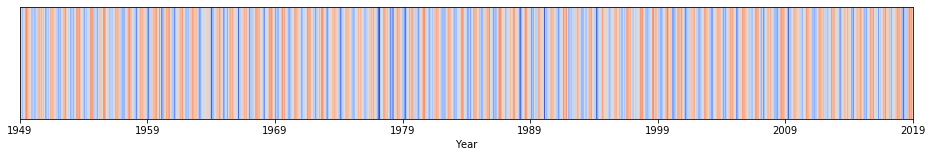

In [0]:
# Yearly plot only runs if avgfreq = 'Y'
if avgfreq == 'Y':
    plt.figure(figsize=(12,10))

    ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -3, vmax = 3)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xticklabels(yearstoget[0::10])
    ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    ax.axes.set_xlim(left = 0, right = len(yearstoget)-1)
    ax.axes.set_xlabel('Year') 

    # For line plot overlay. Uncomment if you want the line plot overlaid
    ax2 = plt.twinx()
    ax2.plot(np.arange(0,len(yearstoget)), df[headername], color = 'black')
    ax2.plot(np.arange(0,len(yearstoget)), df[headername], 'ko')
    ax2.axes.set_ylabel('Average annual \n maximum temperature \n (deg C)')
 
    plt.show()

if avgfreq == 'M':
    # Monthly plot
    plt.figure(figsize=(12,10))

    ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -25, vmax = 25)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xticks(np.arange(0,841,120))
    ax.axes.set_xticklabels(yearstoget[0::10])
    ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    ax.axes.set_xlim(left = 0, right = (len(yearstoget)-1)*numperyear)
    ax.axes.set_xlabel('Year') 

    # For line plot overlay. Uncomment if you want the line plot overlaid
    ax2 = plt.twinx()
    ax2.plot(np.arange(0,len(yearstoget)*numperyear), df[headername], color = 'black')
    ax2.plot(np.arange(0,len(yearstoget)*numperyear), df[headername], 'ko')
    ax2.axes.set_ylabel('Average monthly \n maximum temperature \n (deg C)')
 
    plt.show()

if avgfreq == 'W':
    # Weekly plot
    plt.figure(figsize=(12,10))

    ax = plt.matshow(df['Anomalies'][np.newaxis,:], cmap='coolwarm', aspect = 'auto', vmin = -35, vmax = 35)
    ax.axes.get_yaxis().set_visible(False)
    ax.axes.set_xticks(np.arange(0,len(df[headername]),520))
    ax.axes.set_xticklabels(yearstoget[0::10])
    ax.axes.tick_params(axis="x", bottom=True, top=False, labelbottom=True, labeltop=False)
    ax.axes.set_xlim(left = 0, right = (len(yearstoget)-1)*numperyear)
    ax.axes.set_xlabel('Year') 

    # For line plot overlay. Uncomment if you want the line plot overlaid
    #ax2 = plt.twinx()
    #ax2.plot(np.arange(0,len(df[headername])), df[headername], color = 'black')
    #ax2.plot(np.arange(0,len(df[headername])), df[headername], 'ko')
    #ax2.axes.set_ylabel('Average monthly \n maximum temperature \n (deg C)')
 
    plt.show()